In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

1.

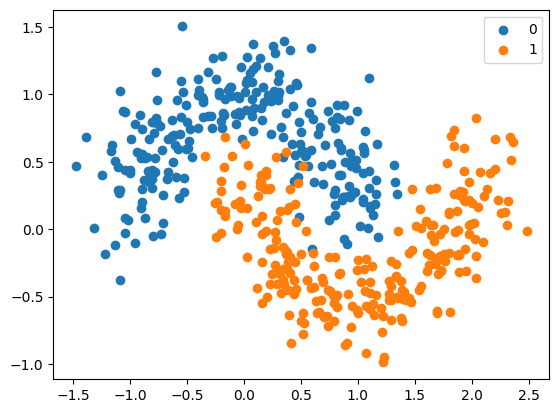

In [ ]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [ ]:
def model():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(64, input_dim=2))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dense(32))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dense(16))
  model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dense(1))
  model.add(keras.layers.Activation('sigmoid'))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
keras.backend.clear_session()
n_train = 300
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = model()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5373 - loss: 0.6449 - val_accuracy: 0.5900 - val_loss: 0.6385
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6345 - loss: 0.6356 - val_accuracy: 0.6950 - val_loss: 0.6267
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7423 - loss: 0.6168 - val_accuracy: 0.7400 - val_loss: 0.6152
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7482 - loss: 0.6143 - val_accuracy: 0.7750 - val_loss: 0.6042
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8042 - loss: 0.5939 - val_accuracy: 0.7850 - val_loss: 0.5940
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8256 - loss: 0.5790 - val_accuracy: 0.7950 - val_loss: 0.5843
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7846 - loss: 0.5798 - val_accuracy: 0.7950 - val_loss: 0.5749
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8012 - loss: 0.5699 - val_accuracy: 0.8000 - val_l

Train: 0.867, Test: 0.850


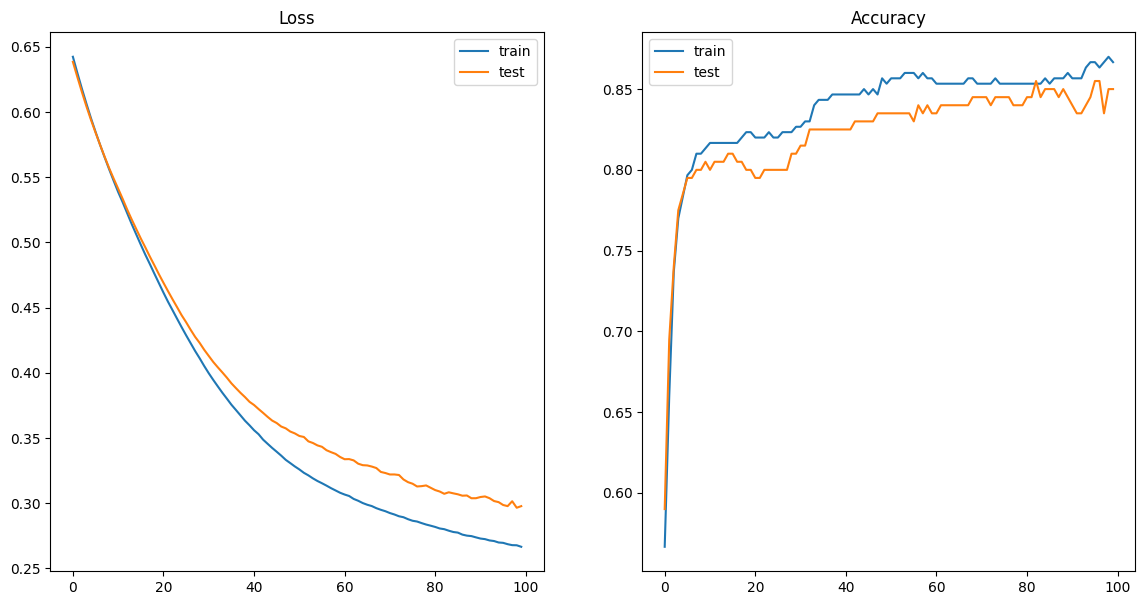

In [ ]:
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

2.

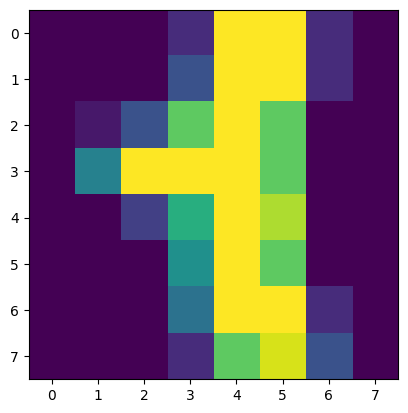

In [ ]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

plt.imshow(X[13].reshape(8,8))

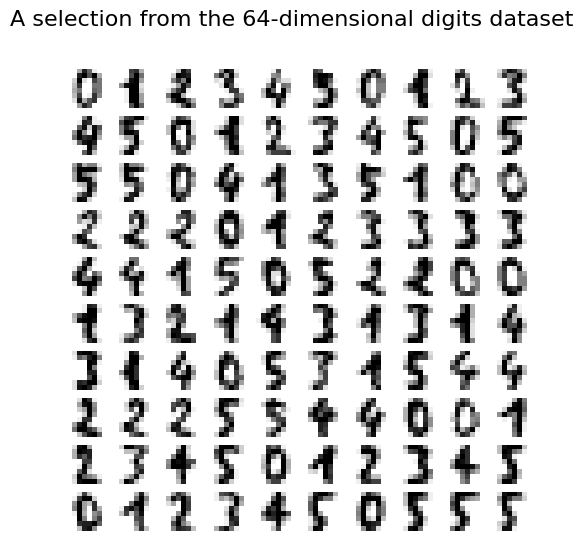

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def model2():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(16, input_dim=64))
  model.add(keras.layers.Activation('relu'))
  #model.add(keras.layers.Dense(32))
  #model.add(keras.layers.Activation('relu'))
  #model.add(keras.layers.Dense(16))
  #model.add(keras.layers.Activation('relu'))
  model.add(keras.layers.Dense(6))
  model.add(keras.layers.Activation('softmax'))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
  return model

In [ ]:
keras.backend.clear_session()
model2 = model2()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2627 - loss: 5.7946 - val_accuracy: 0.5530 - val_loss: 1.3289
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6849 - loss: 0.8793 - val_accuracy: 0.7834 - val_loss: 0.6463
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8154 - loss: 0.5437 - val_accuracy: 0.8664 - val_loss: 0.3932
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8883 - loss: 0.3636 - val_accuracy: 0.8894 - val_loss: 0.3526
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9398 - loss: 0.2394 - val_accuracy: 0.8387 - val_loss: 0.4915
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1954 - val_accuracy: 0.9355 - val_loss: 0.1706
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.1414 - val_accuracy: 0.9447 - val_loss: 0.1371
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9682 - loss: 0.1136 - val_accuracy: 0.9539 - 

Train: 1.000, Test: 0.986


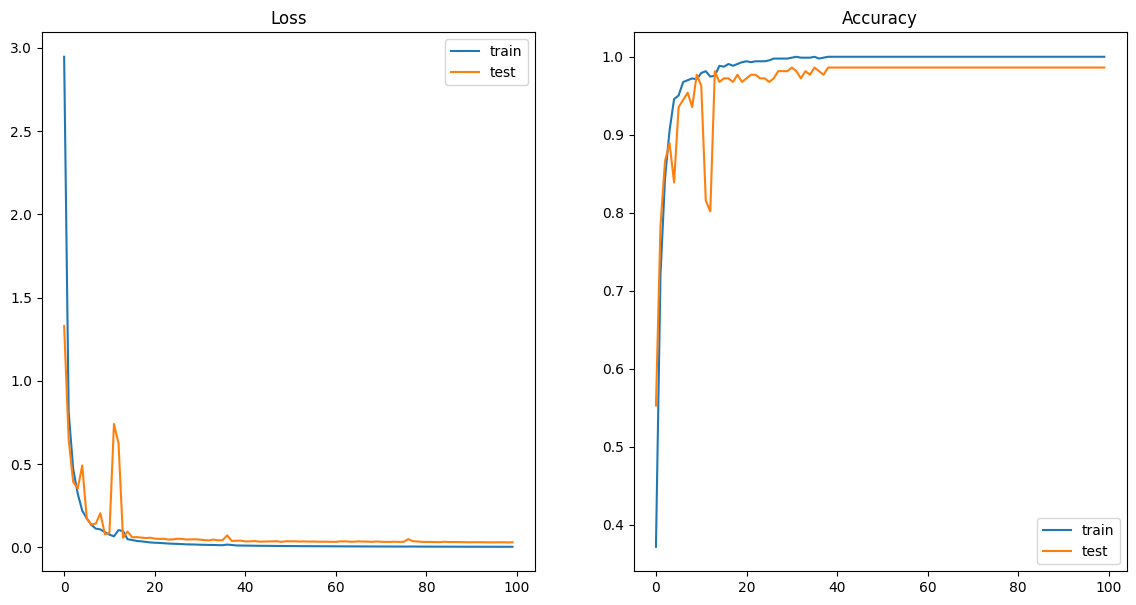

In [ ]:
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.show()